# Making a Binary Synth Spectrum

In [1]:
import VPtools as vp
import matplotlib.pyplot as plt

path_google='G:/Shared drives/'

## 1. Making a binary spectrum from two TLUSTY spectra

First we need to read the TLUSTY file names for each of our stars in the typical way. In this example I've chosen star 1 to have a temperature of 20000 K, logg of 4 and a macroturbulence of 2 km/s and star 2 to have a temperature of 16000 K, logg of 4 and a macroturbulence of 2 km/s

In [2]:
my_model_name1 = vp.tlusty.galB_path_name.format('vis','20000','400','2')
my_model_name2 = vp.tlusty.galB_path_name.format('vis','16000','400','2')

We will also need to choose additional stellar parameters for our stars such as projected rotational velocity (vsini), radial velocity (vrad), as well as the ratio stellar radii for the two stars (R2/R1). 

In [3]:
vsini1=120 #km/s
vsini2=10 #km/s
vrad1=0 #km/s
vrad2=-10 #km/s
R2R1=1 #the stars have the same radii

We can now call the `tlusty_binary` function, which will calculate a normalized joint binary model and return a synth object.

NOTE: this function may take upwards of 30 seconds to run.

In [4]:
joint=vp.tlusty_binary(path_google,my_model_name1,my_model_name2,vsini1,vsini2,R2R1,vrad1,vrad2)

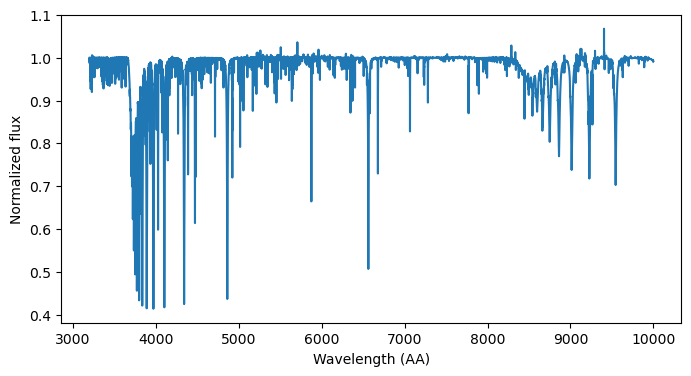

In [5]:
fig, ax = plt.subplots(1,1, figsize=(8,4))

ax.plot(joint.wl, joint.specI)
ax.set_ylabel('Normalized flux')
ax.set_xlabel('Wavelength (AA)')
plt.show()

Zooming in on a small section of the spectra we can clearly see the contributions of a broad lined star and a narrow lined star around the Mg II 4481 line.

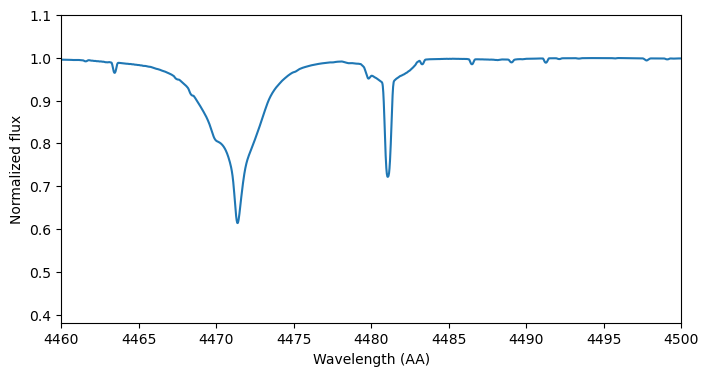

In [6]:
fig, ax = plt.subplots(1,1, figsize=(8,4))

ax.plot(joint.wl, joint.specI)
ax.set_ylabel('Normalized flux')
ax.set_xlabel('Wavelength (AA)')
ax.set_xlim(4460,4500)
plt.show()

## 2. Making a binary spectrum from two CMFGEN spectra

First we need to read the CMFGEN file names for each of our stars in the typical way.

In [7]:
table = vp.cmfgen.get_table_galOB()
display(table)

,Root,Teff,log(g),Z,t,a,c,n,o,Mdot,vinfty,beta,finfty,vcl
0,C_s12020g2.30z-0.01t5.0_a0.00c-0.26n0.59o0.00_...,12020,2.30,-0.01,5,0,-0.26,0.59,0.00,-7.39,975,1.0,1.0,0
1,C_s12050g2.18z-0.01t5.0_a0.00c-0.08n0.23o0.02_...,12050,2.18,-0.01,5,0,-0.08,0.23,0.02,-7.55,948,1.0,0.1,30
2,C_s12540g2.24z-0.01t5.0_a0.00c-0.02n1.14o0.02_...,12540,2.24,-0.01,5,0,-0.02,1.14,0.02,-7.30,981,1.0,0.1,30
3,C_s12790g2.15z0.00t5.0_a0.00c-0.30n0.65o-0.04_...,12790,2.15,0.00,5,0,-0.30,0.65,-0.04,-6.68,910,1.0,1.0,0
4,C_s13960g2.32z0.00t5.0_a0.00c-0.30n0.65o-0.04_...,13960,2.32,0.00,5,0,-0.30,0.65,-0.04,-6.76,1014,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,C_s57477g4.16z-0.42t10.0_a0.00c0.03n0.08o0.03_...,57477,4.16,-0.42,10,0,0.03,0.08,0.03,-4.71,3500,1.0,0.1,100
305,C_s58057g4.41z-1.48t10.0_a0.00c-0.01n-0.01o-0....,58057,4.41,-1.48,10,0,-0.01,-0.01,-0.01,-7.22,5000,1.0,0.1,100
306,C_s59406g4.28z-0.73t10.0_a0.00c0.02n0.02o0.02_...,59406,4.28,-0.73,10,0,0.02,0.02,0.02,-5.97,5220,1.0,0.1,100
307,C_s60690g4.41z-1.48t10.0_a0.00c-0.01n-0.01o-0....,60690,4.41,-1.48,10,0,-0.01,-0.01,-0.01,-6.99,5212,1.0,0.1,100


Here I've chosen two stars with very different temperatures and logg's.

In [8]:
root1 = table.loc[4,"Root"]
my_model_name1 = vp.cmfgen.galOB_path_name.format(root1,'VIS')
print(my_model_name1)

root2 = table.loc[47,"Root"]
my_model_name2 = vp.cmfgen.galOB_path_name.format(root2,'VIS')
print(my_model_name2)

ResearchGroupResources-Files/ReferenceMaterial/CMFGEN/CMFGEN-OB/C_s13960g2.32z0.00t5.0_a0.00c-0.30n0.65o-0.04_Mdot-6.76Vinfty1014beta1.0finfty1.0vcl0_VIS.spec
ResearchGroupResources-Files/ReferenceMaterial/CMFGEN/CMFGEN-OB/C_s23000g4.00z-0.01t10.0_a0.00c-0.03n0.01o-0.02_Mdot-9.00Vinfty2145beta1.0finfty0.1vcl100_VIS.spec


We will also need to choose additional stellar parameters for our stars such as projected rotational velocity (vsini), radial velocity (vrad), as well as the ratio stellar radii for the two stars (R2/R1). 

In [9]:
vsini1=120 #km/s
vsini2=10 #km/s
vrad1=0 #km/s
vrad2=-10 #km/s
R2R1=1 #the stars have the same radii

We can now call the `cmfgen_binary` function, which will calculate a normalized joint binary model and return a synth object.

NOTE: this function may take upwards of a minute to run.

In [10]:
joint=vp.cmfgen_binary(path_google,my_model_name1,my_model_name2,vsini1,vsini2,R2R1,vrad1,vrad2)

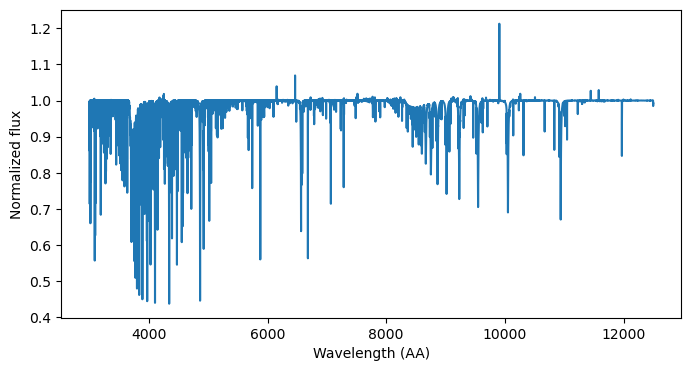

In [11]:
fig, ax = plt.subplots(1,1, figsize=(8,4))

ax.plot(joint.wl, joint.specI)
ax.set_ylabel('Normalized flux')
ax.set_xlabel('Wavelength (AA)')
plt.show()

Zooming in on a small section of the spectra we can clearly see the contributions of a broad lined star and a narrow lined star around the Mg II 4481 line.

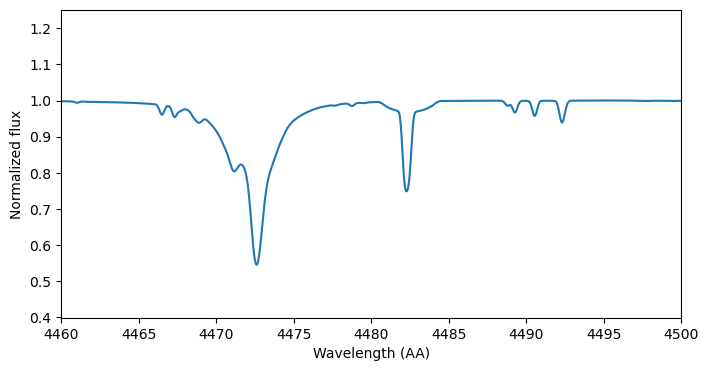

In [12]:
fig, ax = plt.subplots(1,1, figsize=(8,4))

ax.plot(joint.wl, joint.specI)
ax.set_ylabel('Normalized flux')
ax.set_xlabel('Wavelength (AA)')
ax.set_xlim(4460,4500)
plt.show()

## 3. Making a binary spectrum from two synth3 spectra

First we need to read the synth4 file names for each of our stars in the typical way. In this example I've chosen star 1 to have a temperature of 12000 K and logg of 4 and star 2 to have a temperature of 7500 K and logg of 4.

NOTE: While we have synth3 spectra up to 31000K, it is generally not accurate above 15000 K

In [19]:
my_model_name1 = vp.synth3.synth3_path_name.format('12000','40')
my_model_name2 = vp.synth3.synth3_path_name.format('07500','40')

We will also need to choose additional stellar parameters for our stars such as projected rotational velocity (vsini), radial velocity (vrad), as well as the ratio stellar radii for the two stars (R2/R1). 

In [20]:
vsini1=120 #km/s
vsini2=10 #km/s
vrad1=0 #km/s
vrad2=-10 #km/s
R2R1=1 #the stars have the same radii

We can now call the `synth3_binary` function, which will calculate a normalized joint binary model and return a synth object.

NOTE: this function may take upwards of 30 seconds to run.

In [21]:
joint=vp.synth3_binary(path_google,my_model_name1,my_model_name2,vsini1,vsini2,R2R1,vrad1,vrad2)

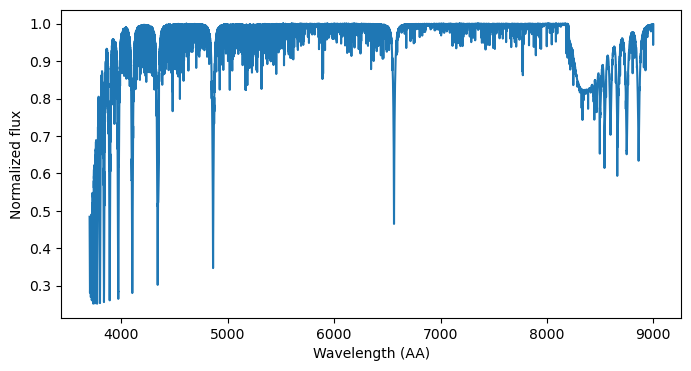

In [22]:
fig, ax = plt.subplots(1,1, figsize=(8,4))

ax.plot(joint.wl, joint.specI)
ax.set_ylabel('Normalized flux')
ax.set_xlabel('Wavelength (AA)')
plt.show()

Zooming in on a small section of the spectra we can clearly see the contributions of a broad lined star and a narrow lined star around the Mg II 4481 line.

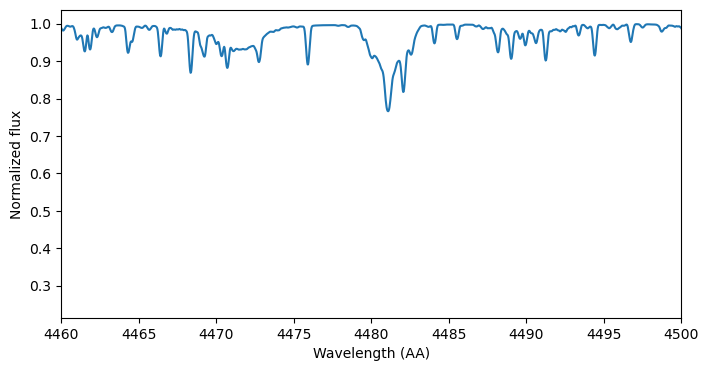

In [23]:
fig, ax = plt.subplots(1,1, figsize=(8,4))

ax.plot(joint.wl, joint.specI)
ax.set_ylabel('Normalized flux')
ax.set_xlabel('Wavelength (AA)')
ax.set_xlim(4460,4500)
plt.show()

## 4. Using the _modelSB function for advanced users

The functions used above are designed to take in the path of the synthetic spectra to be used in the binary model. However this is not always what we need. For example you may have your own synthetic spectra tailored to your needs, or you may only care about a specific chunk of the spectum, in which case there is no need to make a model of the entire spectra since that takes a while to run.

We can directly use the `modelSB` function by passing in the **unnormalized** spectra and **continuum** spectra directly.

NOTE: beware of making a joint model from two synthetic spectra with different specI units (i.e. cmfgen and tlusty) as the code will not work in these cases.

### 4.1 Example with normal TLUSTY spectra

For the first example, I will pass the tlusty synth objects directly into the function.

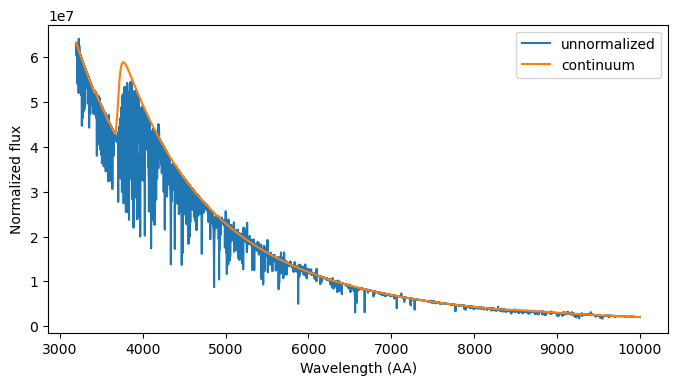

In [13]:
my_model_name1 = vp.tlusty.galB_path_name.format('vis','20000','400','2')
my_model_name2 = vp.tlusty.galB_path_name.format('vis','16000','400','2')

synth1,synth1_con=vp.tlusty.read(path_google+my_model_name1)
synth2,synth2_con=vp.tlusty.read(path_google+my_model_name2)

vsini1=120 #km/s
vsini2=10 #km/s
vrad1=0 #km/s
vrad2=-10 #km/s
R2R1=1 #the stars have the same radii

fig, ax = plt.subplots(1,1, figsize=(8,4))

ax.plot(synth1.wl, synth1.specI,label='unnormalized')
ax.plot(synth1_con.wl, synth1_con.specI,label='continuum')
ax.set_ylabel('Normalized flux')
ax.set_xlabel('Wavelength (AA)')
ax.legend()
plt.show()

Make sure you are passing the function a **unnormalized** spectra and **continuum** spectra. The output of this function is identical to the `tlusty_binary`, `cmfgen_binary`, and `synth3_binary` functions

In [14]:
joint=vp.modelSB(synth1,synth1_con,synth2,synth2_con,vsini1,vsini2,R2R1,vrad1,vrad2)

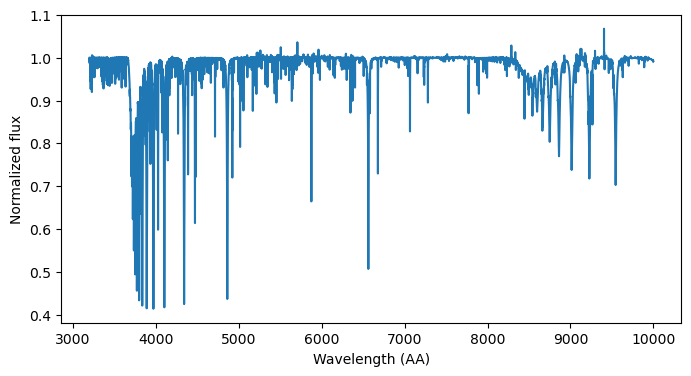

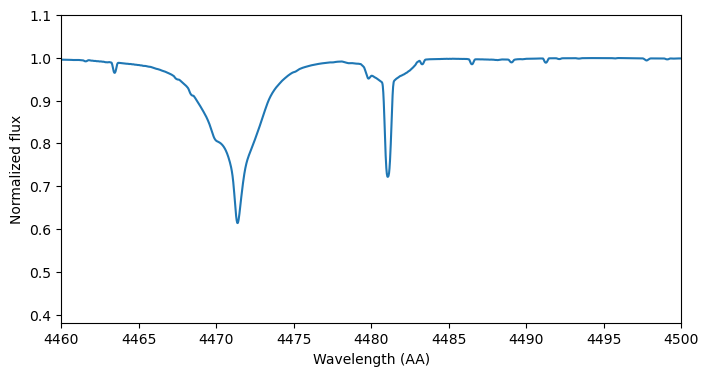

In [15]:
fig, ax = plt.subplots(1,1, figsize=(8,4))

ax.plot(joint.wl, joint.specI)
ax.set_ylabel('Normalized flux')
ax.set_xlabel('Wavelength (AA)')
plt.show()

fig, ax = plt.subplots(1,1, figsize=(8,4))

ax.plot(joint.wl, joint.specI)
ax.set_ylabel('Normalized flux')
ax.set_xlabel('Wavelength (AA)')
ax.set_xlim(4460,4500)
plt.show()

### 4.2 Example with normal CMFGEN spectra

For CMFGEN, the read function returns an unnormalized spectra and a normalized spectra. To run the `modelSB` function we need to calculate the continuum spectra by dividing the unnormalized spectra by the normalized spectra and converting that to a synth object

ResearchGroupResources-Files/ReferenceMaterial/CMFGEN/CMFGEN-OB/C_s13960g2.32z0.00t5.0_a0.00c-0.30n0.65o-0.04_Mdot-6.76Vinfty1014beta1.0finfty1.0vcl0_VIS.spec
ResearchGroupResources-Files/ReferenceMaterial/CMFGEN/CMFGEN-OB/C_s23000g4.00z-0.01t10.0_a0.00c-0.03n0.01o-0.02_Mdot-9.00Vinfty2145beta1.0finfty0.1vcl100_VIS.spec


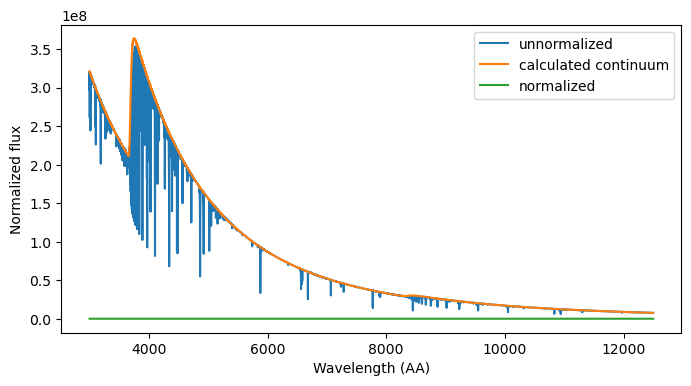

In [16]:
table = vp.cmfgen.get_table_galOB()

root1 = table.loc[4,"Root"]
my_model_name1 = vp.cmfgen.galOB_path_name.format(root1,'VIS')
print(my_model_name1)

root2 = table.loc[47,"Root"]
my_model_name2 = vp.cmfgen.galOB_path_name.format(root2,'VIS')
print(my_model_name2)

synth1,synth1_norm=vp.cmfgen.read(path_google+my_model_name1)
synth2,synth2_norm=vp.cmfgen.read(path_google+my_model_name2)

vsini1=120 #km/s
vsini2=10 #km/s
vrad1=0 #km/s
vrad2=-10 #km/s
R2R1=1 #the stars have the same radii

#calculating the continuum spectra and writing to a synth object
synth1_con=vp.Synth(synth1.wl,synth1.specI/synth1_norm.specI)
synth2_con=vp.Synth(synth2.wl,synth2.specI/synth2_norm.specI)

fig, ax = plt.subplots(1,1, figsize=(8,4))

ax.plot(synth1.wl, synth1.specI,label='unnormalized')
ax.plot(synth1_con.wl, synth1_con.specI,label='calculated continuum')
ax.plot(synth1_norm.wl, synth1_norm.specI,label='normalized')
ax.set_ylabel('Normalized flux')
ax.set_xlabel('Wavelength (AA)')
ax.legend()
plt.show()

We can now pass the **unnormalized** spectra and **continuum** spectra into the function

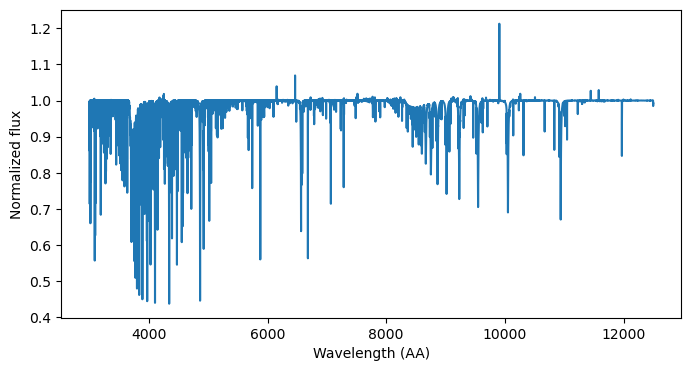

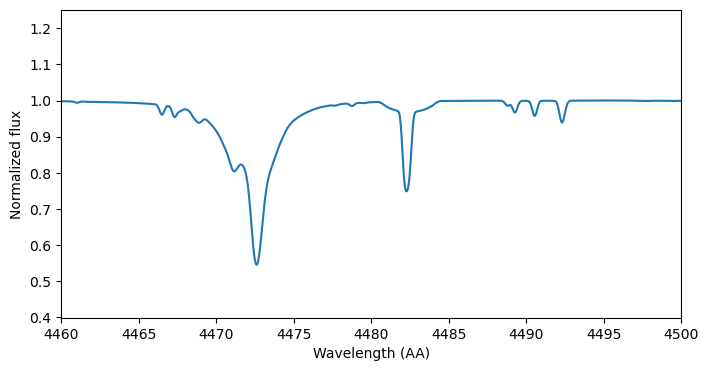

In [17]:
joint=vp.modelSB(synth1,synth1_con,synth2,synth2_con,vsini1,vsini2,R2R1,vrad1,vrad2)

fig, ax = plt.subplots(1,1, figsize=(8,4))

ax.plot(joint.wl, joint.specI)
ax.set_ylabel('Normalized flux')
ax.set_xlabel('Wavelength (AA)')
plt.show()

fig, ax = plt.subplots(1,1, figsize=(8,4))

ax.plot(joint.wl, joint.specI)
ax.set_ylabel('Normalized flux')
ax.set_xlabel('Wavelength (AA)')
ax.set_xlim(4460,4500)
plt.show()

### 4.3 Example with normal synth3 spectra

For synth3, the read function returns a normalized spectra and continuum spectra. To run the `modelSB` function we need to calculate the unormalzied spectra by multiplying the normalized spectra and the continuum spectra and converting that to a synth object

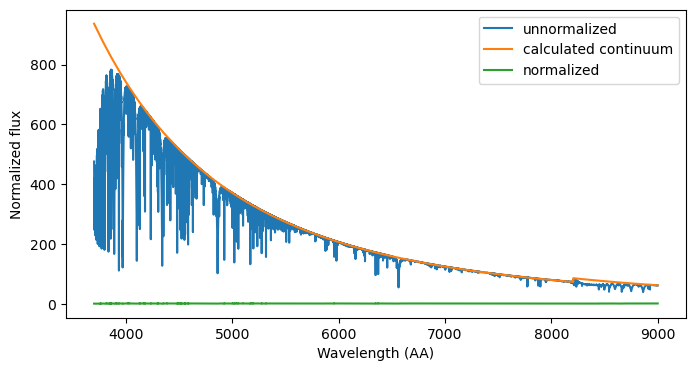

In [25]:
my_model_name1=vp.synth3.synth3_path_name.format('12000','40')
my_model_name2=vp.synth3.synth3_path_name.format('07500','40')

synth1_norm, synth1_con = vp.synth3.read(path_google+my_model_name1)
synth2_norm, synth2_con = vp.synth3.read(path_google+my_model_name2)

vsini1=120 #km/s
vsini2=10 #km/s
vrad1=0 #km/s
vrad2=-10 #km/s
R2R1=1 #the stars have the same radii

#calculating the unnormalized spectra
synth1=vp.Synth(synth1_norm.wl,synth1_con.specI*synth1_norm.specI)
synth2=vp.Synth(synth2_norm.wl,synth2_con.specI*synth2_norm.specI)

fig, ax = plt.subplots(1,1, figsize=(8,4))

ax.plot(synth1.wl, synth1.specI,label='unnormalized')
ax.plot(synth1_con.wl, synth1_con.specI,label='calculated continuum')
ax.plot(synth1_norm.wl, synth1_norm.specI,label='normalized')
ax.set_ylabel('Normalized flux')
ax.set_xlabel('Wavelength (AA)')
ax.legend()
plt.show()


We can now pass the **unnormalized** spectra and **continuum** spectra into the function

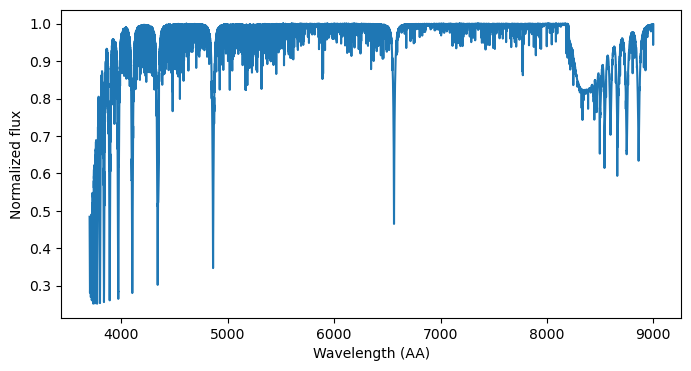

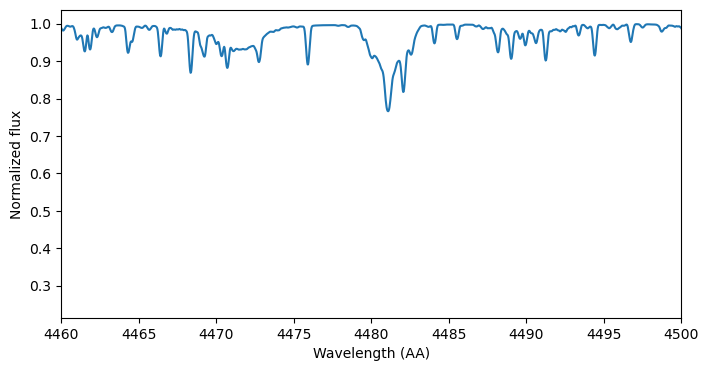

In [26]:
joint=vp.modelSB(synth1,synth1_con,synth2,synth2_con,vsini1,vsini2,R2R1,vrad1,vrad2)

fig, ax = plt.subplots(1,1, figsize=(8,4))

ax.plot(joint.wl, joint.specI)
ax.set_ylabel('Normalized flux')
ax.set_xlabel('Wavelength (AA)')
plt.show()

fig, ax = plt.subplots(1,1, figsize=(8,4))

ax.plot(joint.wl, joint.specI)
ax.set_ylabel('Normalized flux')
ax.set_xlabel('Wavelength (AA)')
ax.set_xlim(4460,4500)
plt.show()

### 4.4 Example using a small portion of a spectrum

Sometimes we only care about a small portion of the spectrum. So there is no need to spend 30+ seconds calculting a binary model, especially if you need to calculate a lot of models.

In this example we will cut out a wavelength range from 4460 $\text{\AA}$ to 4500 $\text{\AA}$

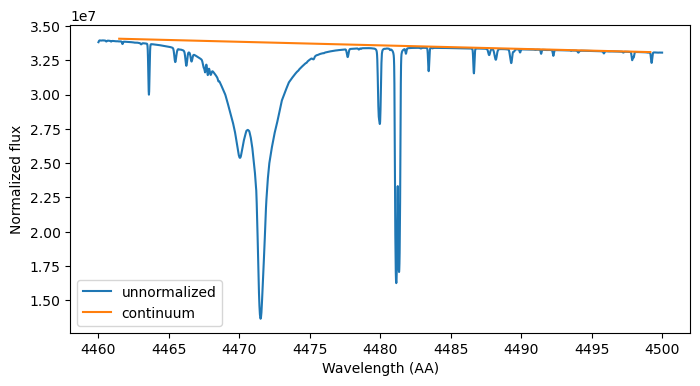

In [18]:
my_model_name1 = vp.tlusty.galB_path_name.format('vis','20000','400','2')
my_model_name2 = vp.tlusty.galB_path_name.format('vis','16000','400','2')

synth1,synth1_con=vp.tlusty.read(path_google+my_model_name1)
synth2,synth2_con=vp.tlusty.read(path_google+my_model_name2)

synth1_cut=synth1.extract_wl_range(4460,4500)
synth1_con_cut=synth1_con.extract_wl_range(4460,4500)
synth2_cut=synth2.extract_wl_range(4460,4500)
synth2_con_cut=synth2_con.extract_wl_range(4460,4500)

vsini1=120 #km/s
vsini2=10 #km/s
vrad1=0 #km/s
vrad2=-10 #km/s
R2R1=1 #the stars have the same radii

fig, ax = plt.subplots(1,1, figsize=(8,4))

ax.plot(synth1_cut.wl, synth1_cut.specI,label='unnormalized')
ax.plot(synth1_con_cut.wl, synth1_con_cut.specI,label='continuum')
ax.set_ylabel('Normalized flux')
ax.set_xlabel('Wavelength (AA)')
ax.legend()
plt.show()

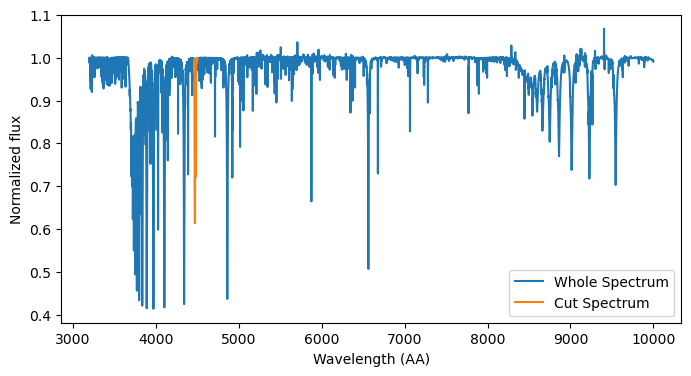

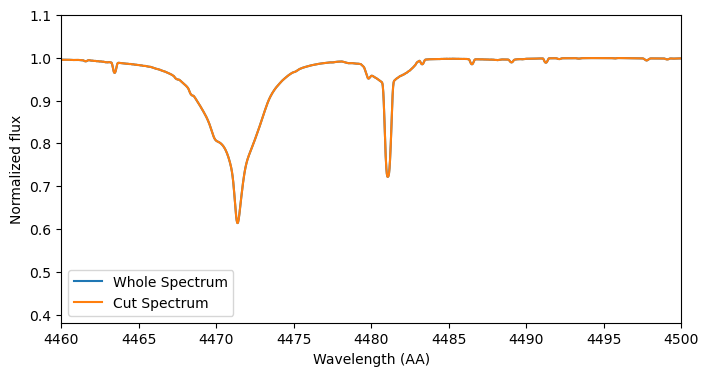

In [19]:
joint_cut=vp.modelSB(synth1_cut,synth1_con_cut,synth2_cut,synth2_con_cut,vsini1,vsini2,R2R1,vrad1,vrad2)
joint=vp.modelSB(synth1,synth1_con,synth2,synth2_con,vsini1,vsini2,R2R1,vrad1,vrad2)

fig, ax = plt.subplots(1,1, figsize=(8,4))

ax.plot(joint.wl, joint.specI,label='Whole Spectrum')
ax.plot(joint_cut.wl, joint_cut.specI,label='Cut Spectrum')
ax.set_ylabel('Normalized flux')
ax.set_xlabel('Wavelength (AA)')
ax.legend()
plt.show()

fig, ax = plt.subplots(1,1, figsize=(8,4))

ax.plot(joint.wl, joint.specI,label='Whole Spectrum')
ax.plot(joint_cut.wl, joint_cut.specI,label='Cut Spectrum')
ax.set_ylabel('Normalized flux')
ax.set_xlabel('Wavelength (AA)')
ax.set_xlim(4460,4500)
ax.legend()
plt.show()